In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

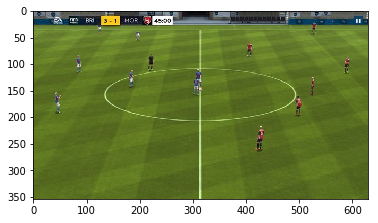

In [2]:
img = cv2.imread('images/fifa-2019.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Convertendo a image para HSV e utilizando uma mascará para selecionar separar o campo dos jogadores

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_green = np.array([30, 40, 40])
upper_green = np.array([70, 255, 255])

#blue range
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

#Red range
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask = cv2.inRange(hsv, lower_green, upper_green)

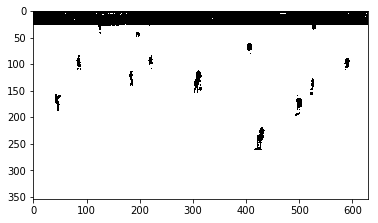

In [4]:
plt.imshow(mask , cmap='gray')

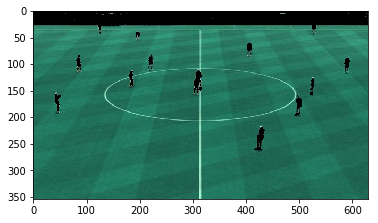

In [5]:
res = cv2.bitwise_and(img, img, mask=mask)
res_bgr = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)
res_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
plt.imshow(res, cmap='gray')

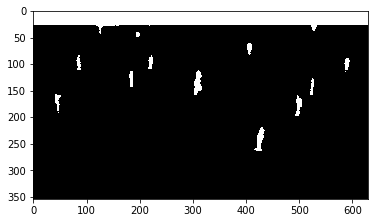

In [6]:
from skimage import morphology
kernel = morphology.star(3).astype(np.uint8)
thresh = cv2.threshold(res_gray, 127, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(thresh, cmap='gray')

In [7]:
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
font = cv2.FONT_HERSHEY_SIMPLEX

In [8]:
teamA = []
teamB = []

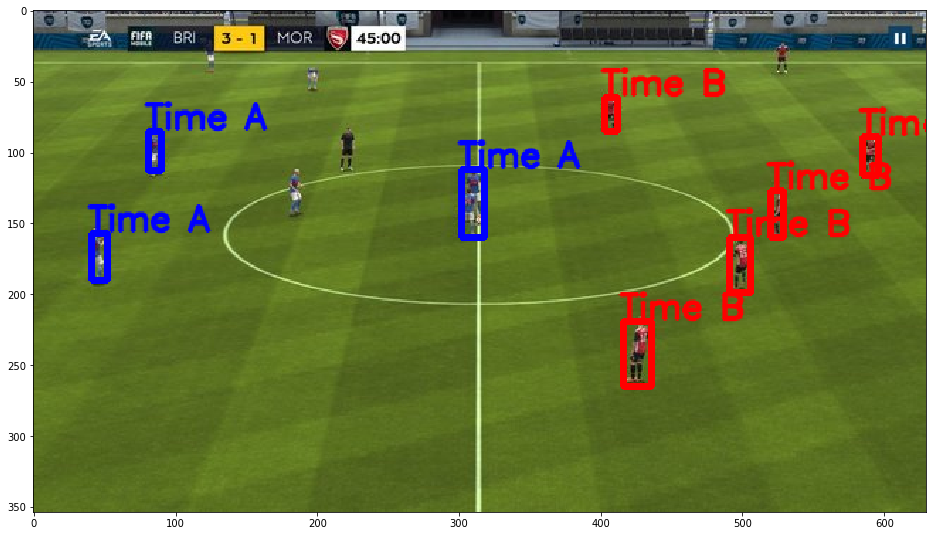

In [9]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if h >= (1.2) * w:
        if w > 5 and h >= 5:
            player_img = img[y : y + h, x : x + w]
            player_hsv = cv2.cvtColor(player_img, cv2.COLOR_BGR2HSV)
            
            #If player has blue jersy
            mask1 = cv2.inRange(player_hsv, lower_blue, upper_blue)
            res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
            res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
            res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
            nzCountBlue = cv2.countNonZero(res1)
            
            #If player has red jersy
            mask2 = cv2.inRange(player_hsv, lower_red, upper_red)
            res2 = cv2.bitwise_and(player_img, player_img, mask=mask2)
            res2 = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)
            res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
            nzCountRed = cv2.countNonZero(res2)
            if(nzCountBlue >=15):
                teamA.append((x,y,h,w))
                cv2.putText(img, 'Time A', (x-2, y-2), font, 0.8, (255,0,0), 2, cv2.LINE_AA)
                cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
            elif(nzCountRed >=15):
                teamB.append((x,y,h,w))
                cv2.putText(img, 'Time B', (x-2, y-2), font, 0.8, (0,0,255), 2, cv2.LINE_AA)
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
                
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
teamA.sort(reverse=False, key=lambda x: x[0])
teamB.sort(reverse=False, key=lambda x: x[0])

In [11]:
img = cv2.imread('images/fifa-2019-LineDetected.jpg')
img_copy = img.copy()

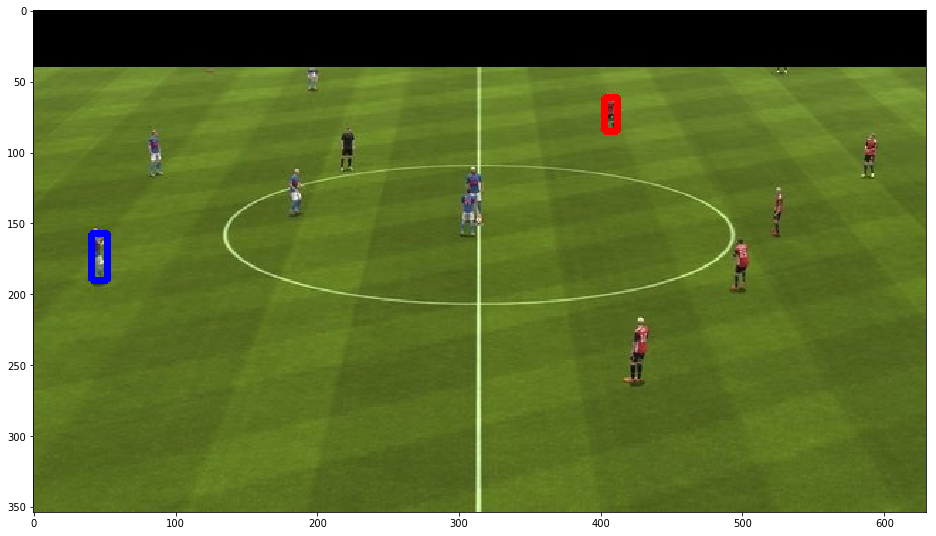

In [12]:
cv2.rectangle(img,(teamA[0][0],teamA[0][1]),(teamA[0][0]+teamA[0][3],teamA[0][1]+teamA[0][2]),(255,0,0),3)
cv2.rectangle(img,(teamB[0][0],teamB[0][1]),(teamB[0][0]+teamB[0][3],teamB[0][1]+teamB[0][2]),(0,0,255),3)
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

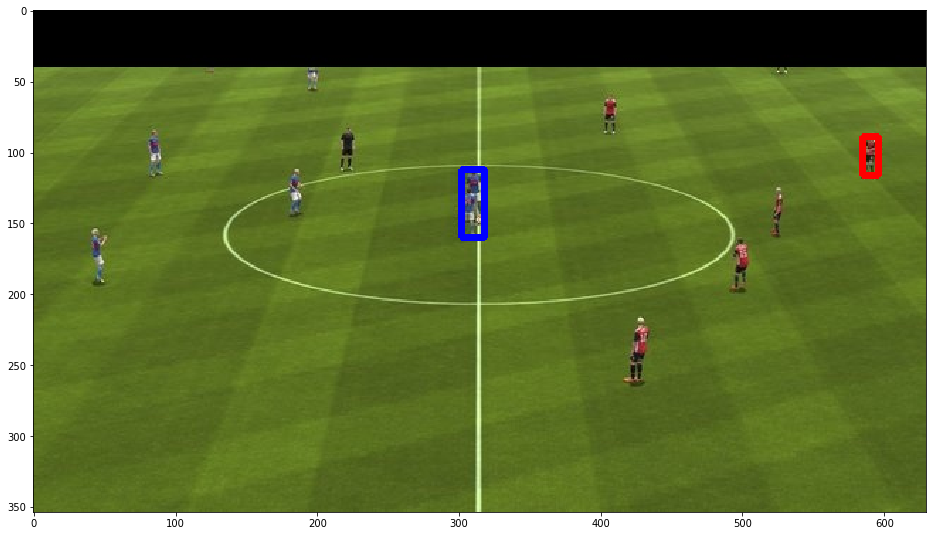

In [13]:
cv2.rectangle(img_copy,(teamA[-1][0],teamA[-1][1]),(teamA[-1][0]+teamA[-1][3],teamA[-1][1]+teamA[-1][2]),(255,0,0),3)
cv2.rectangle(img_copy,(teamB[-1][0],teamB[-1][1]),(teamB[-1][0]+teamB[-1][3],teamB[-1][1]+teamB[-1][2]),(0,0,255),3)
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))